In [1]:
import matplotlib.pyplot as plt

In [2]:
import cv2

In [3]:
import numpy as np

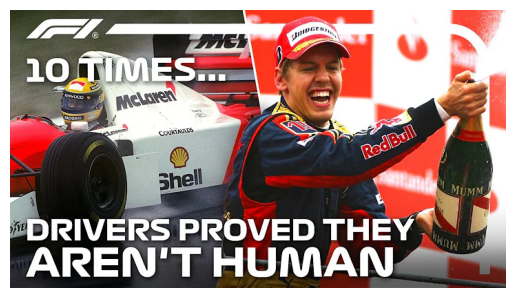

In [4]:
## Read an image

img_path = "images/thumbnail-4.webp"

img = cv2.imread(img_path)

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()

(404, 720, 3)


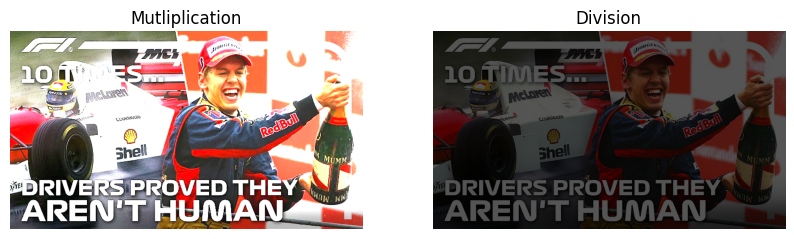

In [5]:
# img_mul = cv2.multiply(img_rgb,np.array([2.0,2.0,2.0]))
# img_div = cv2.divide(img_rgb,np.array([3.0,3.0,3.0]))
r,c,f = img_rgb.shape
print(img_rgb.shape)

img_mul = img_rgb.copy()
img_div = img_rgb.copy()


for i in range(r):
    for j in range(c):
        img_mul[i][j] = np.clip(img_rgb[i][j] * 2.0, 0, 255)
        img_div[i][j] = img_rgb[i][j] // 3


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_mul)
plt.title("Mutliplication")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_div)
plt.title("Division")
plt.axis("off")
plt.show()

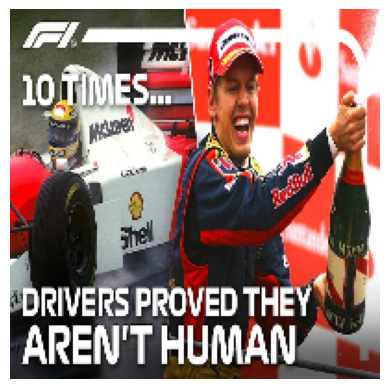

In [6]:
img_rsize = cv2.resize(img_rgb,[200,200])

plt.imshow(img_rsize)
plt.axis("off")
plt.show()

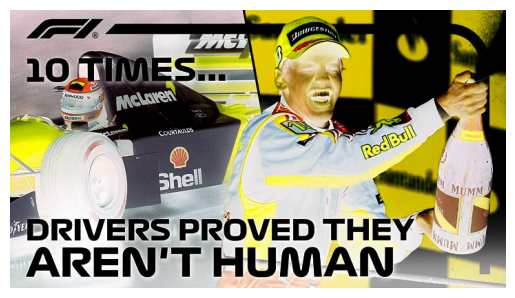

In [7]:
img_not= cv2.bitwise_not(img)

plt.imshow(img_not)
plt.axis("off")
plt.show()

Four Neighbors: [(49, 50), (51, 50), (50, 49), (50, 51)]
Eight Neighbors: [(49, 50), (51, 50), (50, 49), (50, 51), (49, 49), (49, 51), (51, 49), (51, 51)]


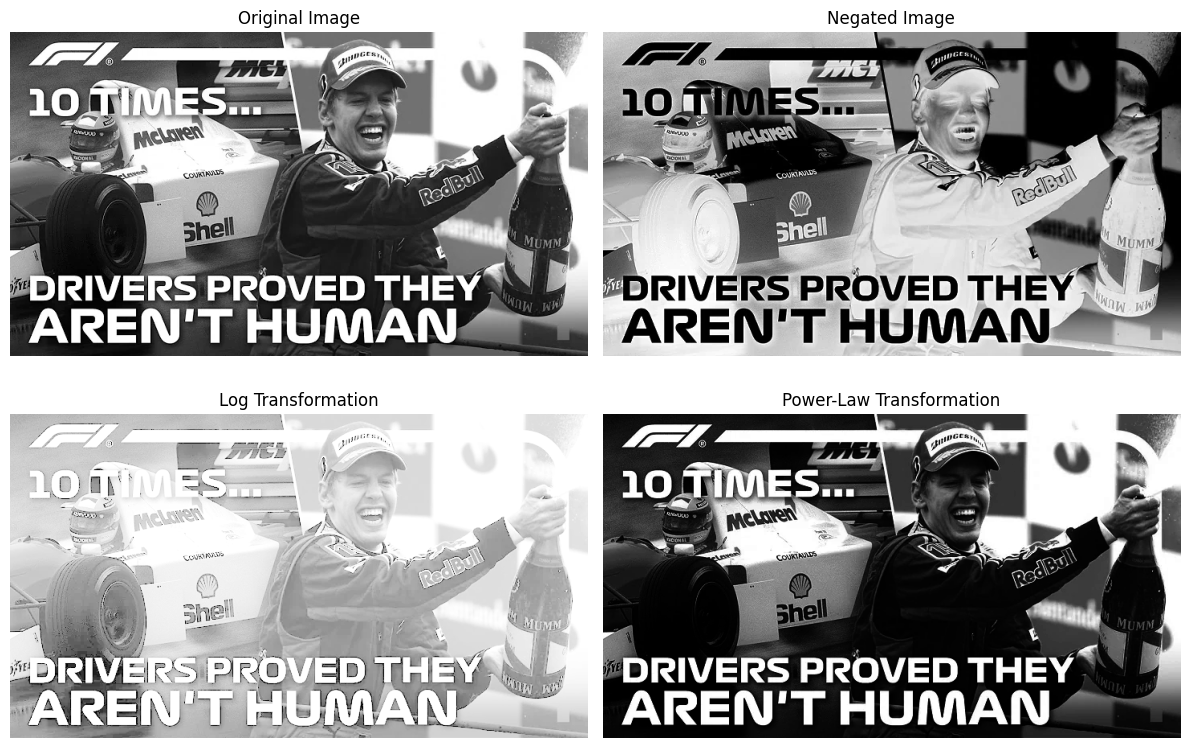

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# 1. Four Neighbors and Eight Neighbors
def get_neighbors(image, x, y):
    rows, cols = image.shape
    neighbors_4 = []
    neighbors_8 = []

    # Four neighbors
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        if 0 <= x + dx < rows and 0 <= y + dy < cols:
            neighbors_4.append((x + dx, y + dy))
            neighbors_8.append((x + dx, y + dy))

    # Diagonal neighbors for eight neighbors
    for dx, dy in [(-1, -1), (-1, 1), (1, -1), (1, 1)]:
        if 0 <= x + dx < rows and 0 <= y + dy < cols:
            neighbors_8.append((x + dx, y + dy))

    return neighbors_4, neighbors_8

# Test neighbors
x, y = 50, 50  # Example pixel coordinates
neighbors_4, neighbors_8 = get_neighbors(image, x, y)
print("Four Neighbors:", neighbors_4)
print("Eight Neighbors:", neighbors_8)

# 2. Distance Formula
def distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# 3. Image Negation
negated_image = 255 - image

# 4. Log Transformation
c = 1
log_transformed = c * np.log1p(image)
log_transformed = np.uint8(255 * log_transformed / np.max(log_transformed))

# 5. Power-Law Transformation
gamma = 2.0
c = 1
power_law_transformed = c * np.power(image / 255.0, gamma)
power_law_transformed = np.uint8(255 * power_law_transformed)

# Display Results
titles = ['Original Image', 'Negated Image', 'Log Transformation', 'Power-Law Transformation']
images = [image, negated_image, log_transformed, power_law_transformed]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


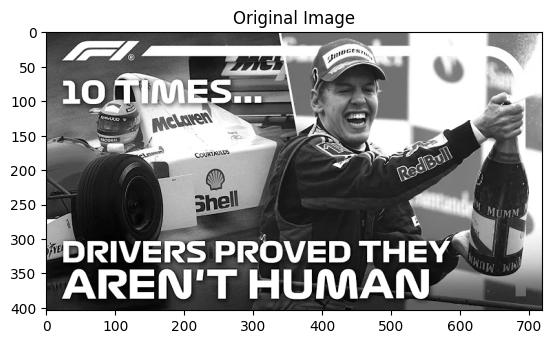

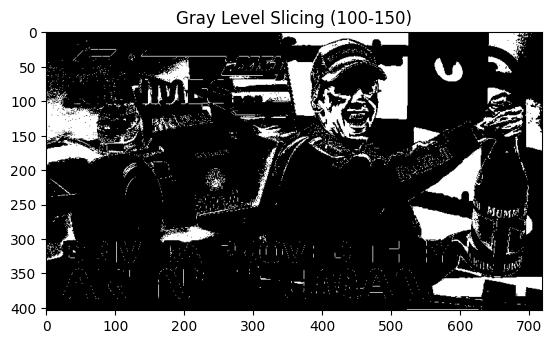

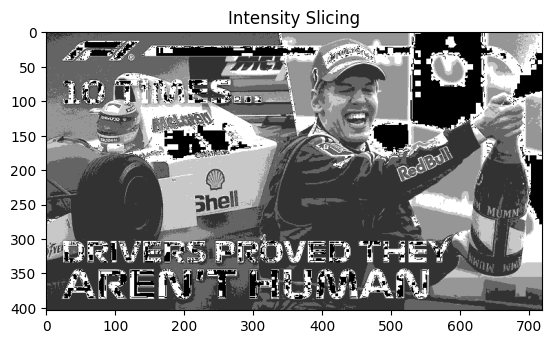

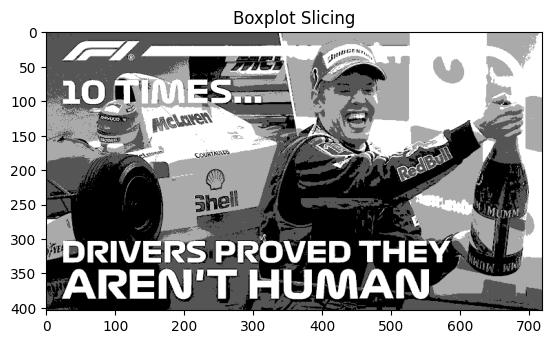

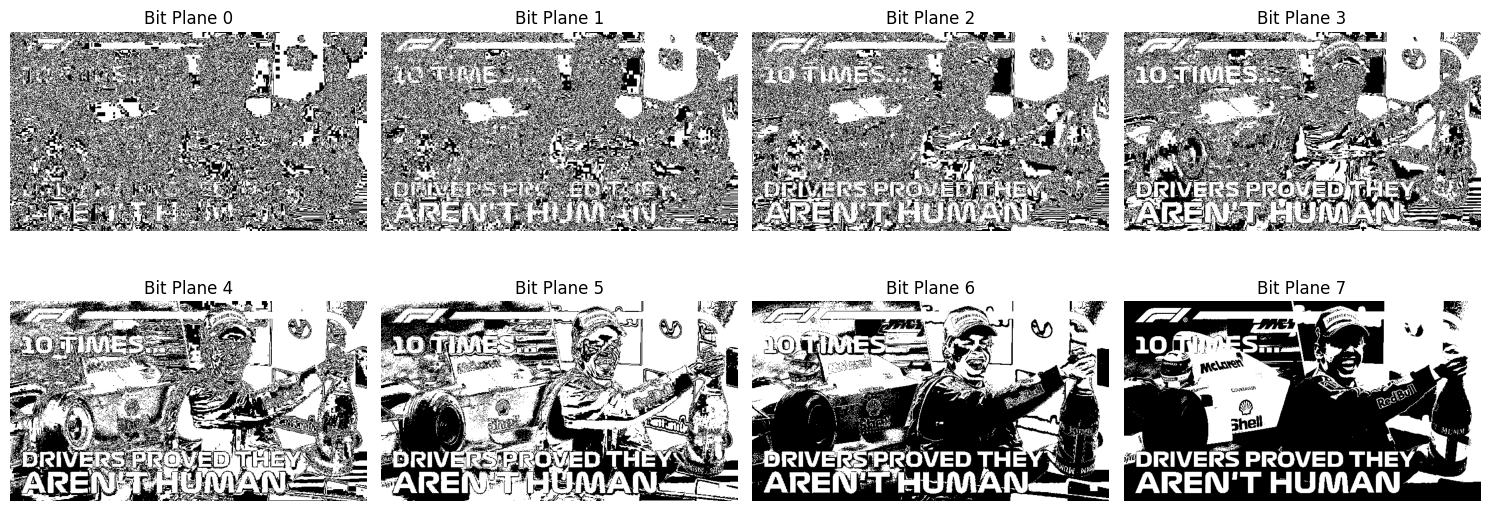

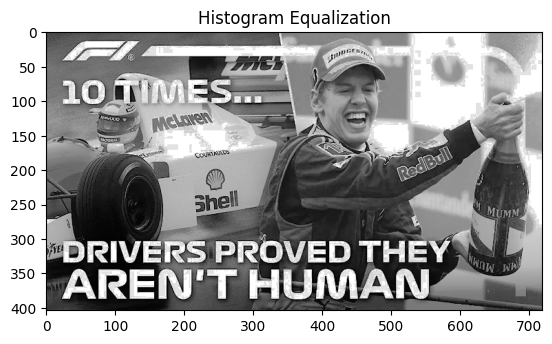

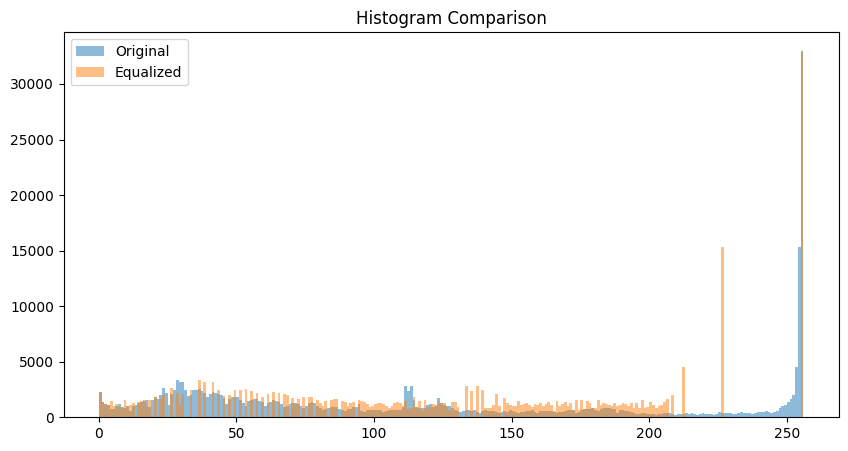

In [9]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
# Load the grayscale image 
# image = cv2.imread('C:/Users/rcc/Downloads/pexels.jpg', cv2.IMREAD_GRAYSCALE) 
# Display original image 
plt.imshow(image, cmap='gray') 
plt.title("Original Image") 
plt.show() 
# 1. Gray Level Slicing 
def gray_level_slicing(image, lower, upper, highlight_value=255, background_value=0): 
    sliced_image = np.where((image >= lower) & (image <= upper), highlight_value, background_value) 
    return sliced_image.astype(np.uint8) 

gray_sliced = gray_level_slicing(image, lower=100, upper=150) 
plt.imshow(gray_sliced, cmap='gray') 
plt.title("Gray Level Slicing (100-150)") 
plt.show() 

# 2. Intensity Slicing 
def intensity_slicing(image, levels): 
    sliced_image = np.zeros_like(image) 
    interval = 256 // len(levels) 
    for i, value in enumerate(levels): 
        lower = i * interval 
        upper = lower + interval 
        sliced_image[(image >= lower) & (image < upper)] = value 
    return sliced_image 
 
levels = [50, 100, 150, 200, 255]  # Example intensity levels 
intensity_sliced = intensity_slicing(image, levels) 
plt.imshow(intensity_sliced, cmap='gray') 
plt.title("Intensity Slicing") 
plt.show() 
 
# 3. Boxplot Slicing 
def boxplot_slicing(image): 
    boxplot_values = np.percentile(image, [25, 50, 75])  # Calculate Q1, Median, Q3 
    sliced_image = np.where(image < boxplot_values[0], 0, 
                    np.where(image < boxplot_values[1], 85, 
                    np.where(image < boxplot_values[2], 170, 255))) 
    return sliced_image.astype(np.uint8) 
 
boxplot_sliced = boxplot_slicing(image) 
plt.imshow(boxplot_sliced, cmap='gray') 
plt.title("Boxplot Slicing") 
plt.show() 
 
# 4. Bit Plane Slicing 
def bit_plane_slicing(image, bit_level): 
    return ((image >> bit_level) & 1) * 255 
 
# Displaying all 8 bit planes 
bit_planes = [bit_plane_slicing(image, i) for i in range(8)] 
 
fig, axes = plt.subplots(2, 4, figsize=(15, 6)) 
for i, ax in enumerate(axes.flatten()): 
    ax.imshow(bit_planes[i], cmap='gray') 
    ax.set_title(f'Bit Plane {i}') 
    ax.axis('off') 
plt.tight_layout() 
plt.show() 
 
# 5. Histogram Equalization 
equalized_image = cv2.equalizeHist(image) 
plt.imshow(equalized_image, cmap='gray') 
plt.title("Histogram Equalization") 
plt.show() 
 
plt.figure(figsize=(10, 5)) 
plt.hist(image.ravel(), bins=256, range=(0, 256), alpha=0.5, label='Original') 
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), alpha=0.5, label='Equalized') 
plt.title("Histogram Comparison") 
plt.legend() 
plt.show()

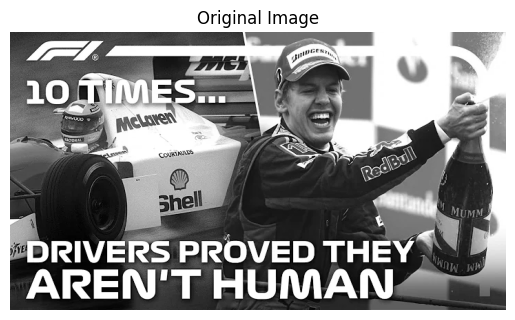

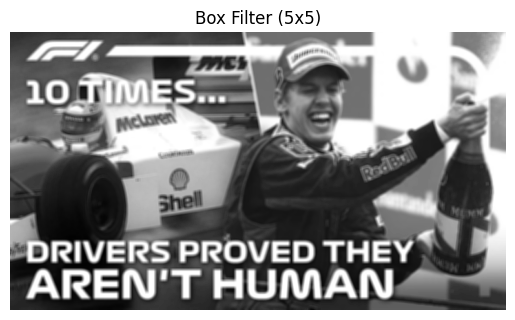

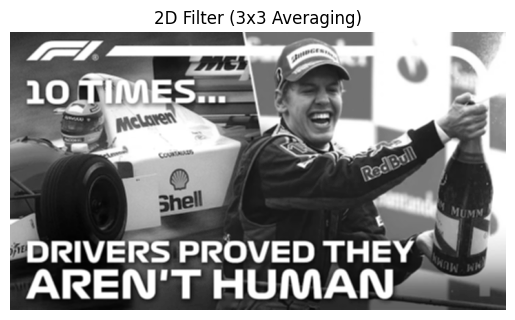

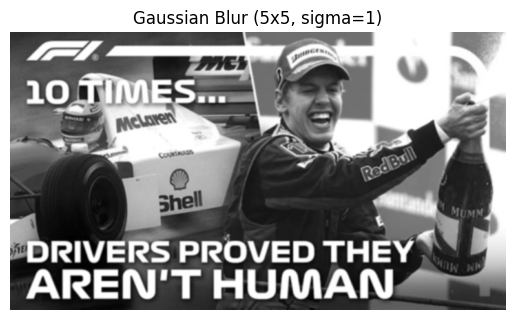

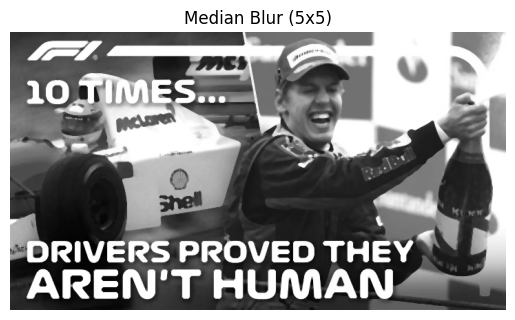

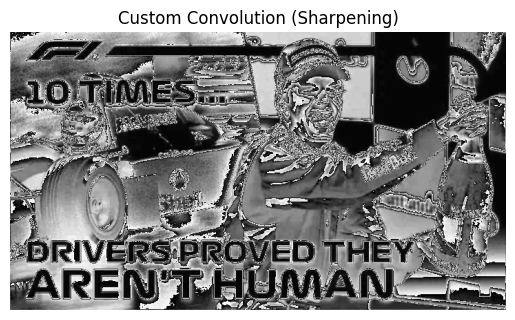

In [10]:
# Box filters, filter 2D, Gaussian Blur, and Median Blur, & write a program to hardcode 
# convolution using a kernel of known size & value 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
# Load the image 
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
# Display original image 
plt.imshow(image, cmap='gray') 
plt.title("Original Image") 
plt.axis('off') 
plt.show() 
# 1. Box Filter 
box_filter = cv2.blur(image, (5, 5))  # Kernel size: 5x5 
plt.imshow(box_filter, cmap='gray') 
plt.title("Box Filter (5x5)") 
plt.axis('off') 
plt.show() 
# 2. Filter 2D 
kernel = np.array([[1, 1, 1],  
[1, 1, 1],  
[1, 1, 1]], dtype=np.float32) / 9  # 3x3 averaging kernel 
filter_2d = cv2.filter2D(image, -1, kernel) 
plt.imshow(filter_2d, cmap='gray') 
plt.title("2D Filter (3x3 Averaging)") 
plt.axis('off') 
plt.show() 
# 3. Gaussian Blur 
gaussian_blur = cv2.GaussianBlur(image, (5, 5), sigmaX=1) 
plt.imshow(gaussian_blur, cmap='gray') 
plt.title("Gaussian Blur (5x5, sigma=1)") 
plt.axis('off') 
plt.show() 
# 4. Median Blur 
median_blur = cv2.medianBlur(image, 5)  # Kernel size: 5 
plt.imshow(median_blur, cmap='gray') 
plt.title("Median Blur (5x5)") 
plt.axis('off') 
plt.show() 

# 5. Hardcoded Convolution 
def hardcoded_convolution(image, kernel): 
    kernel_height, kernel_width = kernel.shape 
    pad_h, pad_w = kernel_height // 2, kernel_width // 2 
    # Pad the image with zeros 
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', 
    constant_values=0) 
    # Prepare output image 
    output = np.zeros_like(image) 
    # Perform convolution 
    for i in range(image.shape[0]): 
        for j in range(image.shape[1]): 
            region = padded_image[i:i+kernel_height, j:j+kernel_width] 
            output[i, j] = np.sum(region * kernel) 
    # Normalize output to range 0-255 
    output = np.clip(output, 0, 255).astype(np.uint8) 
    return output
    
# Example kernel for convolution 
custom_kernel = np.array([[0, -1, 0], 
                          [-1, -1, -1], 
                          [0, -1, 0]])  # Example sharpening kernel 
custom_convolution = hardcoded_convolution(image, custom_kernel) 
plt.imshow(custom_convolution, cmap='gray') 
plt.title("Custom Convolution (Sharpening)") 
plt.axis('off') 
plt.show() 




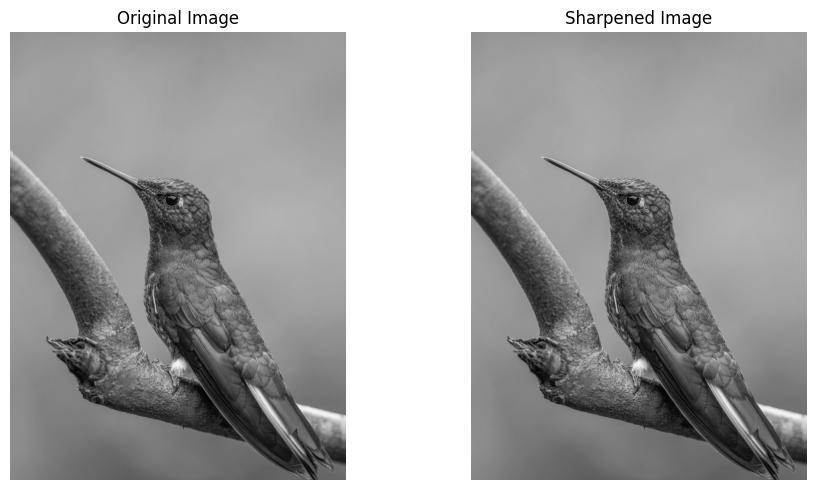

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "images/bird.jpg"
# Load the image
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Define the sharpening kernel
sharpening_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Apply the kernel to the image
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

sharpened_image = cv2.normalize(sharpened_image, None, 0, 255, cv2.NORM_MINMAX)


# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()


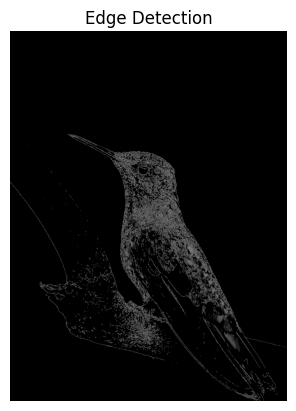

Laplacian Variance (Sharpness): 188.64839543267715


In [12]:
edges = cv2.Canny(image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.show()

laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()
print(f"Laplacian Variance (Sharpness): {laplacian_var}")


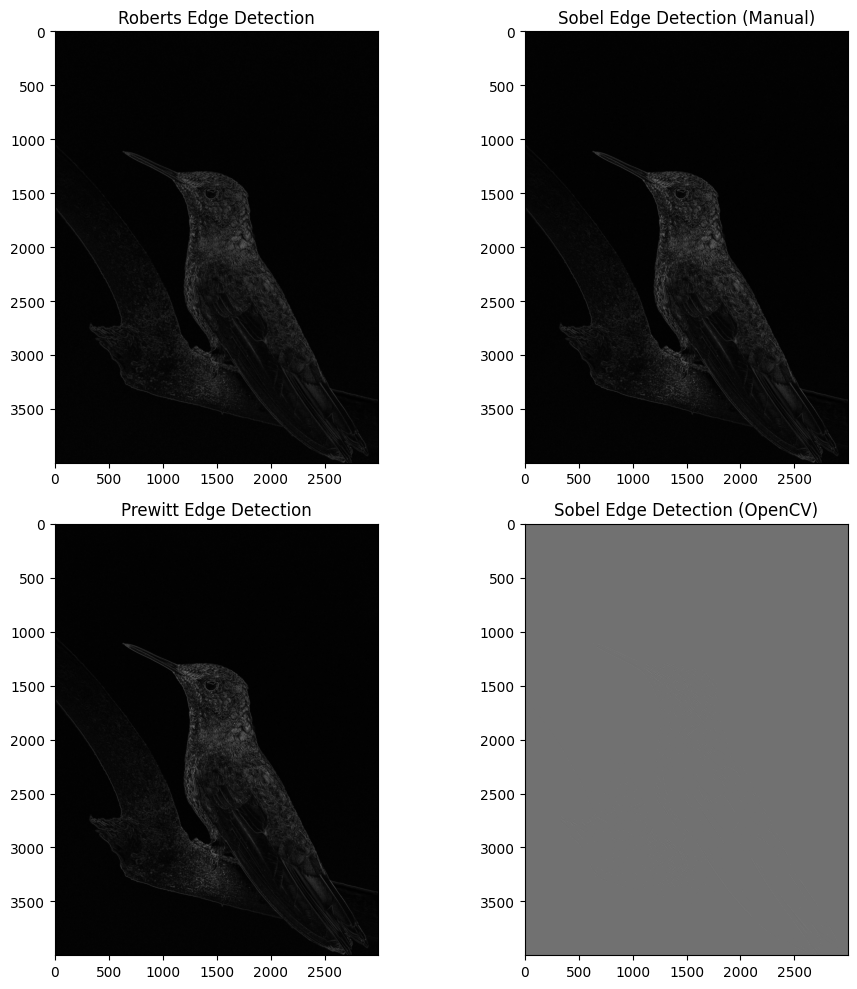

In [13]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
# Define the edge detection functions 
def roberts_edge_detection(image): 
    image = np.float32(image) 
    kernel_x = np.array([[1, 0], [0, -1]]) 
    kernel_y = np.array([[0, 1], [-1, 0]]) 
    grad_x = cv2.filter2D(image, -1, kernel_x) 
    grad_y = cv2.filter2D(image, -1, kernel_y) 
    grad = cv2.sqrt(grad_x**2 + grad_y**2)  # Combine gradients 
    return grad 
def sobel_edge_detection(image): 
    image = np.float32(image)  # Convert to float32 for calculations 
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) 
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) 
    grad_x = cv2.filter2D(image, -1, kernel_x) 
    grad_y = cv2.filter2D(image, -1, kernel_y) 
    grad = cv2.sqrt(grad_x**2 + grad_y**2)  # Combine gradients 
    return grad 
def prewitt_edge_detection(image): 
    image = np.float32(image)  # Convert to float32 for calculations 
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]) 
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]) 
    grad_x = cv2.filter2D(image, -1, kernel_x) 
    grad_y = cv2.filter2D(image, -1, kernel_y) 
    grad = cv2.sqrt(grad_x**2 + grad_y**2)  # Combine gradients 
    return grad 
# Load the image in grayscale 
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
edges_roberts = roberts_edge_detection(image) 
edges_sobel = sobel_edge_detection(image) 
edges_prewitt = prewitt_edge_detection(image) 
edges_sobel_opencv = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3) 
# Normalize 
edges_roberts_normalized = cv2.normalize(edges_roberts, None, 0, 255, cv2.NORM_MINMAX) 
edges_roberts_normalized = np.uint8(edges_roberts_normalized) 
edges_sobel_normalized = cv2.normalize(edges_sobel, None, 0, 255, cv2.NORM_MINMAX) 
edges_sobel_normalized = np.uint8(edges_sobel_normalized) 
edges_prewitt_normalized = cv2.normalize(edges_prewitt, None, 0, 255, cv2.NORM_MINMAX) 
edges_prewitt_normalized = np.uint8(edges_prewitt_normalized) 
edges_sobel_opencv_normalized = cv2.normalize(edges_sobel_opencv, None, 0, 255, 
cv2.NORM_MINMAX) 
edges_sobel_opencv_normalized = np.uint8(edges_sobel_opencv_normalized) 
plt.figure(figsize=(10, 10)) 
plt.subplot(2, 2, 1) 
plt.imshow(edges_roberts_normalized, cmap='gray') 
plt.title('Roberts Edge Detection') 
plt.subplot(2, 2, 2) 
plt.imshow(edges_sobel_normalized, cmap='gray') 
plt.title('Sobel Edge Detection (Manual)') 
plt.subplot(2, 2, 3) 
plt.imshow(edges_prewitt_normalized, cmap='gray') 
plt.title('Prewitt Edge Detection') 
plt.subplot(2, 2, 4) 
plt.imshow(edges_sobel_opencv_normalized, cmap='gray') 
plt.title('Sobel Edge Detection (OpenCV)') 
plt.tight_layout() 
plt.show() 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = '/mnt/data/bird.jpg'
image = cv2.imread(img_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the image using OpenCV
cv2.imshow('Original Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# 1. Multiplication and Division by constant
multiplied = cv2.multiply(image, np.array([2.0]))
divided = cv2.divide(image, np.array([2.0]))

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(multiplied, cv2.COLOR_BGR2RGB))
plt.title('Multiplied by 2')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(divided, cv2.COLOR_BGR2RGB))
plt.title('Divided by 2')
plt.axis('off')
plt.show()

# 2. Resize image
resized = cv2.resize(image, (500, 500))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title('Resized Image (500x500)')
plt.axis('off')
plt.show()

# 3. Slice part of the image
sliced = image[100:300, 200:400]  # Adjust the coordinates as needed
plt.imshow(cv2.cvtColor(sliced, cv2.COLOR_BGR2RGB))
plt.title('Sliced Part of Image')
plt.axis('off')
plt.show()

# 4. Mask a part of the image
mask = np.zeros(image.shape[:2], dtype=np.uint8)
cv2.rectangle(mask, (200, 100), (400, 300), 255, -1)  # Create a mask
masked_image = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Masked Image')
plt.axis('off')
plt.show()

# 5. Add two images
added = cv2.add(image, image)
plt.imshow(cv2.cvtColor(added, cv2.COLOR_BGR2RGB))
plt.title('Added Image')
plt.axis('off')
plt.show()

# 6. Weighted addition of two images
weighted = cv2.addWeighted(image, 0.7, image, 0.3, 0)
plt.imshow(cv2.cvtColor(weighted, cv2.COLOR_BGR2RGB))
plt.title('Weighted Added Image')
plt.axis('off')
plt.show()

# 7. Subtract two images
subtracted = cv2.subtract(image, image)
plt.imshow(cv2.cvtColor(subtracted, cv2.COLOR_BGR2RGB))
plt.title('Subtracted Image')
plt.axis('off')
plt.show()

# 8. Logical AND, OR, NOT
and_image = cv2.bitwise_and(image, image)
or_image = cv2.bitwise_or(image, image)
not_image = cv2.bitwise_not(image)

# Display logical operations
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(and_image, cv2.COLOR_BGR2RGB))
plt.title('Logical AND')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(or_image, cv2.COLOR_BGR2RGB))
plt.title('Logical OR')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(not_image, cv2.COLOR_BGR2RGB))
plt.title('Logical NOT')
plt.axis('off')
plt.show()




In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.cluster import KMeans

img_path = "images/bird.jpg"

def load_and_show(img_path):
   img = cv2.imread(img_path)
   plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
   plt.show()
   return img

def basic_operations(img):
   # Multiply/divide
   mult = cv2.multiply(img, 1.5) 
   div = cv2.divide(img, 2.0)
   
   # Resize to 300x300
   resized = cv2.resize(img, (300,300))
   
   # Slice center region
   h,w = img.shape[:2]
   slice = img[h//4:3*h//4, w//4:3*w//4]
   
   # Create mask
   mask = np.zeros(img.shape[:2], dtype=np.uint8)
   mask[100:300, 100:300] = 255
   masked = cv2.bitwise_and(img, img, mask=mask)
   
   return {'multiplied':mult, 'divided':div, 
           'resized':resized, 'sliced':slice, 'masked':masked}

def transformations(img):
   # Negation
   neg = 255 - img
   
   # Log transform
   c = 255/np.log(1 + np.max(img))
   log = np.array(c * np.log(1 + img), dtype=np.uint8)
   
   # Power-law
   gamma = 1.5
   power = np.array(255*(img/255)**gamma, dtype=np.uint8)
   
   # Grayscale slicing
   gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   thresh = 127
   gray_slice = np.copy(gray)
   gray_slice[gray > thresh] = 255
   
   return {'negative':neg, 'log':log, 
           'power':power, 'gray_slice':gray_slice}

def filters(img):
   # Box filter
   box = cv2.boxFilter(img, -1, (5,5))
   
   # Gaussian
   gauss = cv2.GaussianBlur(img, (5,5), 0)
   
   # Median
   median = cv2.medianBlur(img, 5)
   
   # Custom convolution
   kernel = np.ones((5,5),np.float32)/25
   custom = cv2.filter2D(img, -1, kernel)
   
   return {'box':box, 'gaussian':gauss,
           'median':median, 'custom':custom}

def edge_detection(img):
   gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
   # Roberts
   roberts_x = np.array([[1, 0], [0, -1]])
   roberts_y = np.array([[0, 1], [-1, 0]])
   rob_x = cv2.filter2D(gray, -1, roberts_x)
   rob_y = cv2.filter2D(gray, -1, roberts_y)
   roberts = np.sqrt(np.square(rob_x) + np.square(rob_y))
   
   # Sobel
   sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
   sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
   sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
   
   # Canny
   canny = cv2.Canny(gray, 100, 200)
   
   return {'roberts':roberts, 'sobel':sobel, 'canny':canny}

def segmentation(img):
   gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
   # Simple threshold
   ret, simple = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
   
   # Otsu
   ret, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
   
   # Adaptive
   adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 11, 2)
   
   return {'simple':simple, 'otsu':otsu, 'adaptive':adaptive}

def morphology(img):
   kernel = np.ones((5,5), np.uint8)
   erosion = cv2.erode(img, kernel)
   dilation = cv2.dilate(img, kernel) 
   opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
   closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
   return {'erosion':erosion, 'dilation':dilation,
           'opening':opening, 'closing':closing}

def kmeans_compression(img, k=8):
    pixels = img.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)
    compressed = kmeans.cluster_centers_[kmeans.labels_]
    return compressed.reshape(img.shape).astype(np.uint8)  # Convert to uint8

def features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    corners = cv2.cornerHarris(gray, 2, 3, 0.04)
    corners = cv2.dilate(corners, None)
    
    fd, hog_img = hog(gray, orientations=8, pixels_per_cell=(16,16),
                     cells_per_block=(1,1), visualize=True)
    hog_img = (hog_img * 255).astype(np.uint8)  # Convert to uint8
    
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(gray, None)
    sift_img = cv2.drawKeypoints(gray, kp, None)
    
    return {'corners': corners.astype(np.uint8),
            'hog': hog_img, 
            'sift': sift_img}

def watershed(img):
   gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
   
   # Noise removal
   kernel = np.ones((3,3), np.uint8)
   opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
   
   # Sure background
   sure_bg = cv2.dilate(opening, kernel, iterations=3)
   
   # Finding sure foreground
   dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
   ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
   
   sure_fg = np.uint8(sure_fg)
   unknown = cv2.subtract(sure_bg, sure_fg)
   
   # Marker labelling
   ret, markers = cv2.connectedComponents(sure_fg)
   markers = markers + 1
   markers[unknown==255] = 0
   
   markers = cv2.watershed(img, markers)
   img[markers == -1] = [255,0,0]
   
   return img



def show_results(results_dict, title="Results"):
    rows = (len(results_dict) + 2) // 3
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5*rows))
    axes = axes.ravel()
    
    for idx, (name, img) in enumerate(results_dict.items()):
        if len(img.shape) == 2:  # Grayscale
            axes[idx].imshow(img, cmap='gray')
        else:  # Color
            axes[idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[idx].set_title(name)
        axes[idx].axis('off')
    
    for idx in range(len(results_dict), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    
    img = load_and_show(img_path)
    
    # Run and display each operation
    show_results(basic_operations(img), "Basic Operations")
    show_results(transformations(img), "Transformations")
    show_results(filters(img), "Filters")
    show_results(edge_detection(img), "Edge Detection")
    show_results(segmentation(img), "Segmentation")
    show_results(morphology(img), "Morphological Operations")
    show_results(features(img), "Feature Detection")
    
    # For single image results
    plt.imshow(cv2.cvtColor(kmeans_compression(img), cv2.COLOR_BGR2RGB))
    plt.title("K-means Compression")
    plt.show()
    
    plt.imshow(cv2.cvtColor(watershed(img.copy()), cv2.COLOR_BGR2RGB))
    plt.title("Watershed Segmentation")
    plt.show()




In [ ]:
def extract_sift_features(image_path): 
    image = cv2.imread(image_path) 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    sift = cv2.SIFT_create() 
    keypoints, descriptors = sift.detectAndCompute(gray_image, None) 
    return image, keypoints, descriptors

img_path = "images/thumbnail-4.webp"
image_with_keypoints, keypoints, descriptors = extract_sift_features(img_path) 
image_rgb = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB) 
image_with_keypoints = cv2.drawKeypoints(image_rgb, keypoints, None, 
flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
plt.figure(figsize=(10, 10)) 
plt.imshow(image_with_keypoints) 
plt.title('SIFT Keypoints') 
plt.axis('off') 
plt.show() 
print(f"Number of keypoints detected: {len(keypoints)}") 